In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

Loading Housing Prices Dataset
and Display Total count of missing values per column

In [ ]:
url = 'https://raw.githubusercontent.com/sorif95/ML-Assignment/main/Housing.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             523 non-null    float64
 1   area              491 non-null    float64
 2   bedrooms          491 non-null    float64
 3   bathrooms         491 non-null    float64
 4   stories           491 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           491 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  price_category    545 non-null    int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 59.7+ KB


In [ ]:
df.isnull().sum()

,0
price,22
area,54
bedrooms,54
bathrooms,54
stories,54
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Preprocess the dataset

In [ ]:
# Handle missing values
df = df.copy()  # Avoid SettingWithCopyWarning
df.loc[:, 'price'] = df['price'].fillna(df['price'].mean())
df.loc[:, 'area'] = df['area'].fillna(df['area'].median())
df.loc[:, 'bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
knn_imputer = KNNImputer(n_neighbors=5)
df.loc[:, 'bathrooms'] = knn_imputer.fit_transform(df[['bathrooms']])
df.loc[:, 'stories'] = df['stories'].fillna(df['stories'].median())
df.loc[:, 'parking'] = df['parking'].fillna(df['parking'].mode()[0])

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df.loc[:, column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df.loc[:, numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Convert 'parking' into binary classification
df['parking_binary'] = df['parking'].apply(lambda x: 0 if x <= 1 else 1)

# Check class imbalance
class_counts = df['parking_binary'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
parking_binary
0    436
1    109
Name: count, dtype: int64


<ipython-input-70-5395cc1b2621>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.76004101  1.76004101 -0.56816858  1.76004101  1.76004101 -0.56816858
  1.76004101  1.76004101  1.76004101 -0.56816858  1.76004101  1.76004101
 -0.56816858  1.76004101  1.76004101  1.76004101  1.76004101 -0.56816858
 -0.56816858  1.76004101  1.76004101  1.76004101  1.76004101 -0.56816858
  1.76004101 -0.56816858  1.76004101  1.76004101  1.76004101  1.76004101
  1.76004101  1.76004101  1.76004101  1.76004101  1.76004101  1.76004101
 -0.56816858  1.76004101  1.76004101  1.76004101  1.76004101  1.76004101
 -0.56816858  1.76004101  1.76004101  1.76004101  1.76004101  1.76004101
  1.76004101 -0.56816858  1.76004101  1.76004101  1.76004101  1.76004101
  1.76004101 -0.56816858  1.76004101  1.76004101  1.76004101  1.76004101
 -0.56816858  1.76004101  1.76004101  1.76004101  1.76004101  1.76004101
  1.76004101  1.76004101  1.76004101  1.760

Train Model

In [ ]:
# Define features and targets
X = df.drop(columns=['price', 'parking_binary'])  # Features
y_classification = df['parking_binary']  # Classification target
y_regression = df['price']  # Regression target

# Split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)


In [ ]:
# Train Naive Bayes Classifier with Cross-Validation
nb_classifier = GaussianNB()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(nb_classifier, X_train_cls, y_train_cls, cv=skf, scoring='accuracy')
nb_classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = nb_classifier.predict(X_test_cls)

# Classification Metrics
print("Classification Metrics:")
print(f"Cross-Validation Accuracy: {np.mean(cross_val_scores):.2f} ± {np.std(cross_val_scores):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_cls, y_pred_cls):.2f}")
print(f"Precision: {precision_score(y_test_cls, y_pred_cls):.2f}")
print(f"Recall: {recall_score(y_test_cls, y_pred_cls):.2f}")
print(f"F1-score: {f1_score(y_test_cls, y_pred_cls):.2f}")

Classification Metrics:
Cross-Validation Accuracy: 0.98 ± 0.01
Test Accuracy: 0.99
Precision: 0.96
Recall: 1.00
F1-score: 0.98


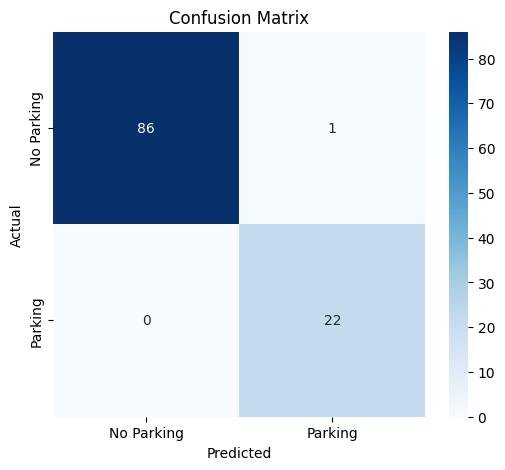

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Parking", "Parking"], yticklabels=["No Parking", "Parking"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [76]:
# Train Naive Bayes Regressor using Discretization
from sklearn.preprocessing import KBinsDiscretizer

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Discretize the target variable using quantile-based bins
bins = 10
discretizer = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile', random_state=42)
y_train_reg_binned = discretizer.fit_transform(y_train_reg.values.reshape(-1, 1)).ravel().astype(int)
y_test_reg_binned = discretizer.transform(y_test_reg.values.reshape(-1, 1)).ravel().astype(int)

# Train Naive Bayes classifier on the binned target
nb_regressor = GaussianNB()
nb_regressor.fit(X_train_reg, y_train_reg_binned)
y_pred_reg_binned = nb_regressor.predict(X_test_reg)

# Convert predicted bins back to continuous values using bin centers
bin_edges = discretizer.bin_edges_[0]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
y_pred_reg = bin_centers[y_pred_reg_binned.astype(int)]

# Regression Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Regression Metrics (Naive Bayes with Discretization):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}")


Regression Metrics (Naive Bayes with Discretization):
MSE: 0.73
RMSE: 0.86
MAE: 0.65
R² score: 0.47


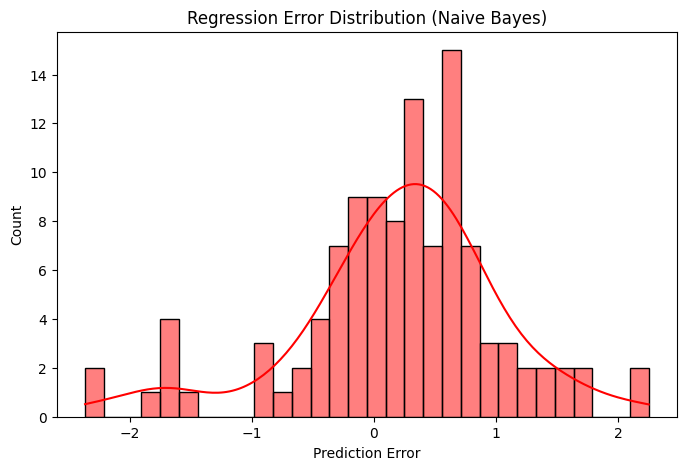

In [77]:
# Error Distribution Visualization
plt.figure(figsize=(8,5))
sns.histplot(y_test_reg - y_pred_reg, bins=30, kde=True, color='red')
plt.title("Regression Error Distribution (Naive Bayes)")
plt.xlabel("Prediction Error")
plt.show()